In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [15]:
import os
from sklearn.decomposition.pca import PCA
from os import listdir
from os.path import isfile, join
from skimage.io import imread
import numpy as np
import pandas as pd
import zipfile as zf
from PIL import Image
import glob

#4.1 Getting the data from Cropped

In [16]:
d = '.'
folder_list = [os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))]
for folder in folder_list:
    if "yale" not in folder:
        folder_list.remove(folder)
#print(folder_list)

In [17]:
len(folder_list)

53

In [18]:
folder_images_list = []
target_variable = []
for folder in folder_list:
    mypath = folder
    # image_files = []
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for file in onlyfiles:
        if ".png" in file:
            folder_images_list.append(mypath+"/"+file)
            target_variable.append(mypath)
    

In [19]:
len(target_variable)

2459

In [3]:
#print(folder_images_list)

In [21]:
#print(folder_images_list[20])

In [1]:
#X.shape

In [195]:
im_count = len(folder_images_list)
im_count

2452

In [196]:
#reading images in
import math
import matplotlib.pyplot as plt
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

In [55]:
# filtering same dimension images

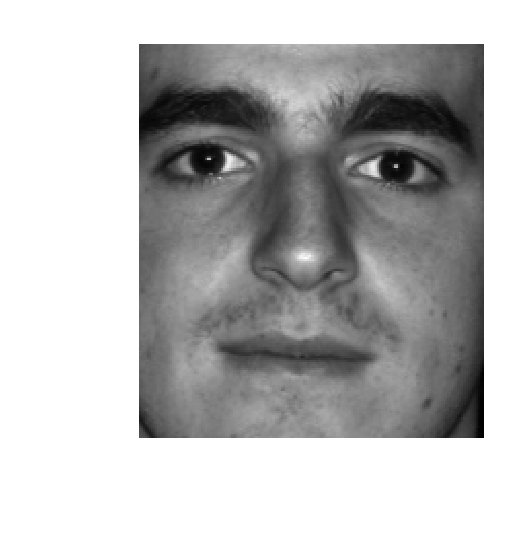

In [268]:
arr = np.zeros([2424,H*W])
count = 0
target_final = []
target_Y = []
for i in range(im_count):
    im = imread(folder_images_list[i], as_grey=True)
    hx, wx = im.shape
    if hx == H and wx == W:
        arr[count,:] = np.reshape(np.asarray(im),[1,H*W])
        target_final.append(target_variable[i])
        
        count += 1
        
image_grid(arr[:1,:],H,W)
plt.show()

## Face Test

In [269]:
len(target_final)

2424

In [270]:
arr.shape

(2424, 32256)

## PCA without centring

In [90]:
pca = PCA(n_components = 300)
pca.fit(arr)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [91]:
train_im_data = pca.transform(arr)

In [92]:
train_im_data.shape

(2424, 300)

In [93]:
feature_list = []
for i in range(train_im_data.shape[1]):
    feature_list.append("feature"+ str(i))

In [94]:
df = pd.DataFrame(train_im_data, columns = feature_list)
df.head()

In [ ]:
df.shape

In [203]:
len(target_final)

2424

## PCA with centering mean

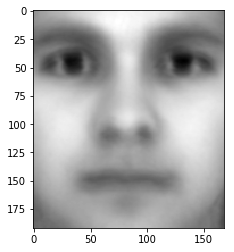

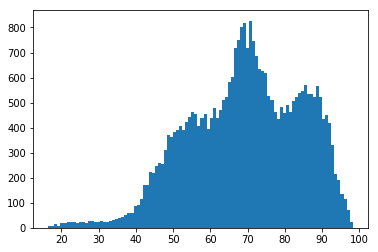

In [210]:
mean_image = np.mean(arr, axis=0)
#getting mean image

plt.imshow(np.reshape(mean_image,[H,W]), cmap = plt.get_cmap("gray"))
plt.figure()
plt.hist(mean_image,bins=100);
plt.show()


In [218]:
arr_norm = np.zeros([im_count, H*W])
arr_norm = arr - mean_image

# Again PCA
pca = PCA()
pca.fit(arr_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [212]:
train_im_data2 = pca.transform(arr_norm) #normed data with mean transform and transformed multiply

In [213]:
train_im_data2.shape

(2424, 2424)

In [206]:
pca.components_[:10,:].shape #this gives teh indvidual components E

(10, 32256)

Elbow is right around 3.5 or 4 for below

In [33]:
df = pd.DataFrame(train_im_data2, columns = feature_list)

In [4]:
#df.head()

In [35]:
df["output"] = list(target_final)

In [36]:
df.to_csv("PCA_with_mean_centring.csv")

In [104]:
H,W = np.shape(im) #creating height and width demensions

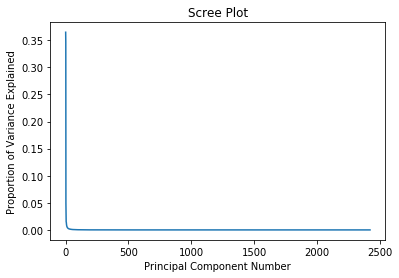

In [220]:
#Looking at Variance
#calculate variance ratios


pve = pca.explained_variance_ratio_
pve.shape
plt.plot(range(len(pve)), pve)
plt.title("Scree Plot")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component Number")
plt.show()

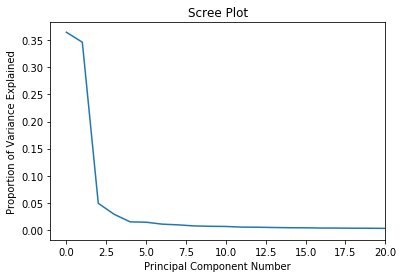

In [217]:
pve = pca.explained_variance_ratio_
pve.shape
plt.plot(range(len(pve)), pve)
plt.title("Scree Plot")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component Number")
plt.xlim(-1, 20)
plt.show()

In [224]:
pca.components_.shape


(2424, 32256)

In [140]:
train_im_data2.shape

(2424, 300)

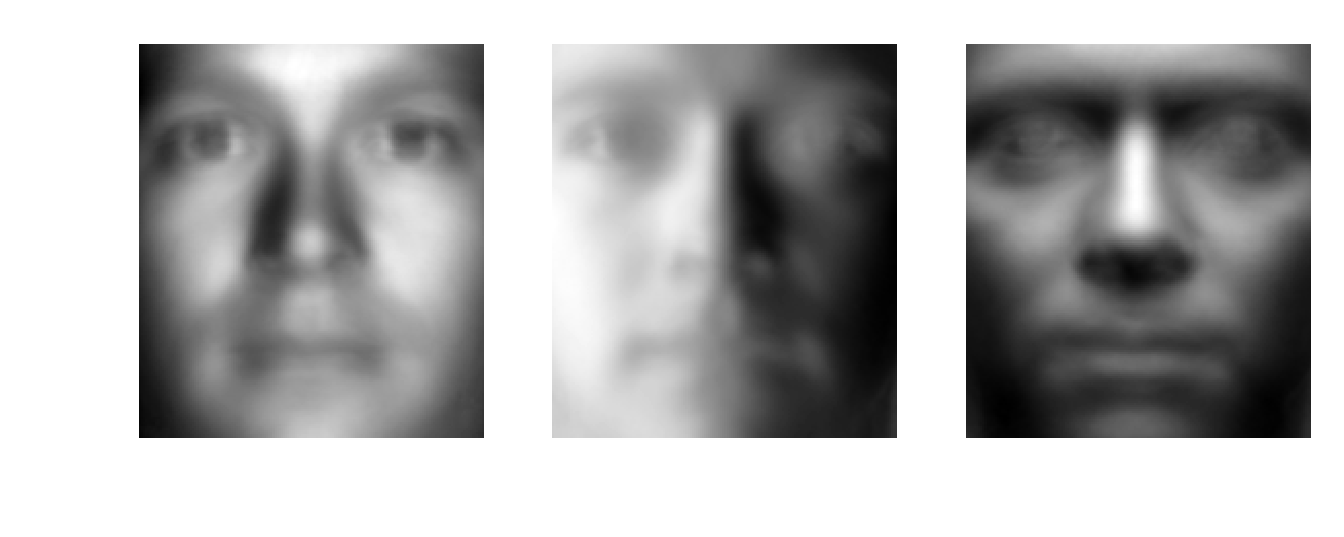

In [227]:
##Plotting first 10 Principle Components
image_grid(pca.components_[:3,:],H,W)
plt.show()

## Printing 10 Eigenvectors

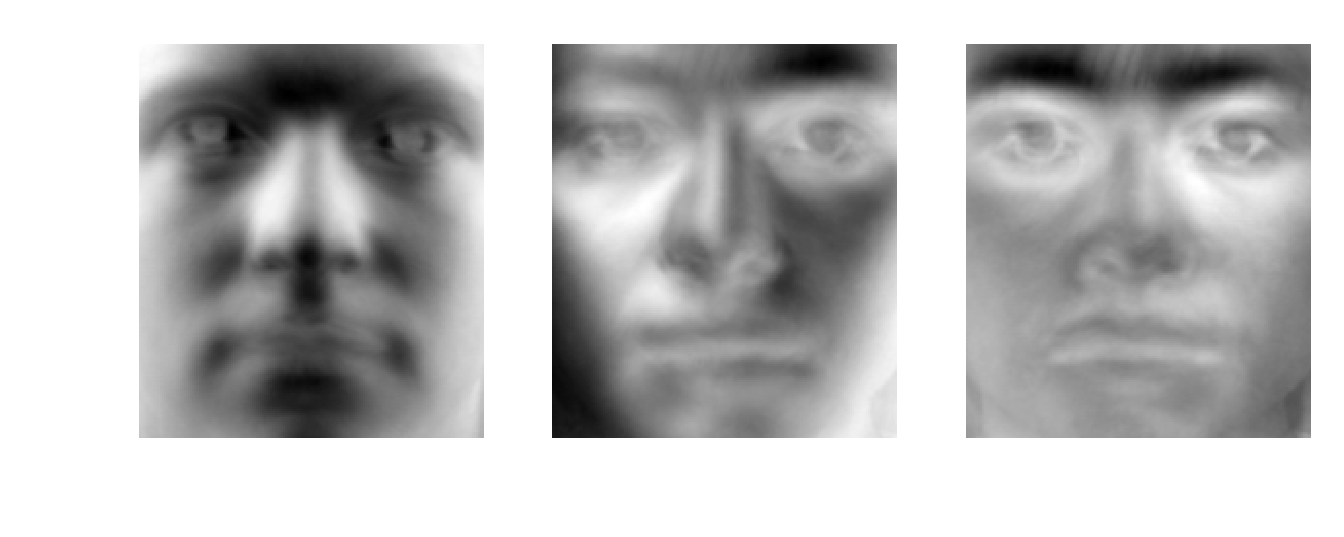

In [228]:
image_grid(pca.components_[3:6,:],H,W)
plt.show()

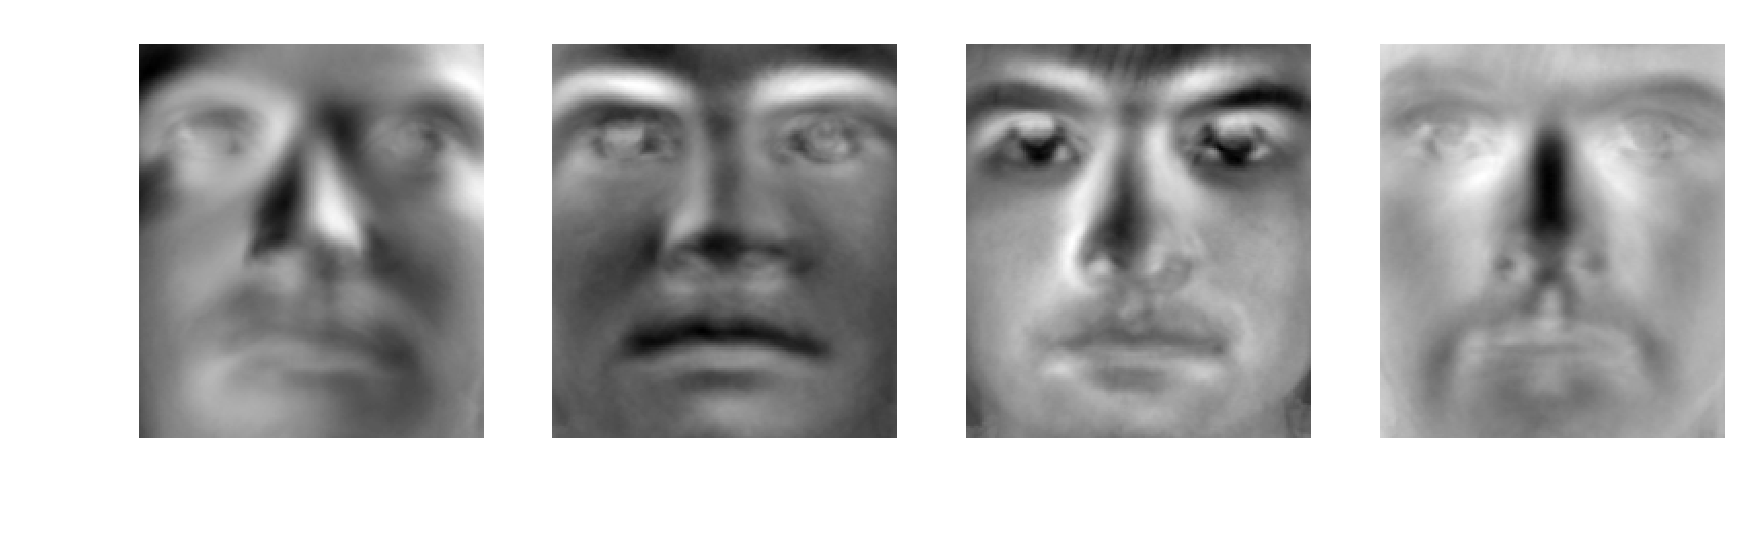

In [229]:
image_grid(pca.components_[6:10,:],H,W)
plt.show()

## Decision Tree Part 7

In [263]:
arr.shape

(2424, 32256)

In [264]:
train_im_data2.shape

(2424, 2424)

In [358]:
#Splitting Data for Decision Tree

from sklearn.model_selection import train_test_split

listm = np.arange(2424)
np.random.shuffle(listm)

index1, index2 = train_test_split(listm, test_size=0.2)

train_before = arr[index1]
test_before = arr[index2]

train_after = train_im_data2[index1]
test_after = train_im_data2[index2]

Y_ident_train = Y_ident2[index1]
Y_ident_test = Y_ident2[index2]

print(index1)

[1803  691 2302 ..., 2104 1941  614]


In [359]:
print(index1)
len(index1)
index1.shape

[1803  691 2302 ..., 2104 1941  614]


(1939,)

In [360]:
len(train_after)
len(test_after)

485

In [361]:
#Need to import values from the names into Y as labels.

import numpy as np
Y_ident = []
words = []

# Separate on comma.
for i in target_final:
    parts = i.split("/")
    Y_ident.append(parts[1])


  


In [362]:
Y_ident2 = np.array(Y_ident)

In [363]:
train_before.shape

(1939, 32256)

In [364]:
type(Y_ident2)

numpy.ndarray

In [365]:
len(Y_ident_test)

485

## 1. Decision Tree Train and Fit On D

In [377]:
#Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(train_before, Y_ident_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [378]:
print('Node Count D:')
print(clf.tree_.node_count)


Node Count D:
499


In [368]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 499 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 29399] <= 5.5 else to node 86.
	node=1 test node: go to node 2 if X[:, 32078] <= 3.5 else to node 39.
		node=2 test node: go to node 3 if X[:, 26032] <= 2.5 else to node 18.
			node=3 test node: go to node 4 if X[:, 31053] <= 3.0 else to node 17.
				node=4 test node: go to node 5 if X[:, 707] <= 2.5 else to node 16.
					node=5 test node: go to node 6 if X[:, 14369] <= 2.5 else to node 11.
						node=6 test node: go to node 7 if X[:, 10891] <= 0.5 else to node 10.
							node=7 test node: go to node 8 if X[:, 20779] <= 0.5 else to node 9.
								node=8 leaf node.
								node=9 leaf node.
							node=10 leaf node.
						node=11 test node: go to node 12 if X[:, 19170] <= 0.5 else to node 15.
							node=12 test node: go to node 13 if X[:, 2788] <= 0.5 else to node 14.
								node=13 leaf node.
								node=14 leaf node.
							node=15 leaf node.
					node=16 leaf node.

								node=350 test node: go to node 351 if X[:, 5267] <= 6.5 else to node 352.
									node=351 leaf node.
									node=352 leaf node.
								node=353 test node: go to node 354 if X[:, 25926] <= 73.0 else to node 355.
									node=354 leaf node.
									node=355 test node: go to node 356 if X[:, 23963] <= 8.0 else to node 357.
										node=356 leaf node.
										node=357 test node: go to node 358 if X[:, 13446] <= 93.0 else to node 359.
											node=358 leaf node.
											node=359 test node: go to node 360 if X[:, 7469] <= 155.5 else to node 361.
												node=360 leaf node.
												node=361 leaf node.
							node=362 test node: go to node 363 if X[:, 9607] <= 53.5 else to node 366.
								node=363 test node: go to node 364 if X[:, 30447] <= 196.5 else to node 365.
									node=364 leaf node.
									node=365 leaf node.
								node=366 test node: go to node 367 if X[:, 29666] <= 92.0 else to node 368.
									node=367 leaf node.
									node=368 leaf node

## Part 1 Cont-- Use the model to predict yˆ on test set, and evaluate your predictions against the true labels y. State the test error.

In [369]:
ypred_dt = clf.predict(test_before)

In [370]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, f1_score

In [371]:
Y_ident_train.shape
ypred_dt.shape

(485,)

In [372]:
print('Accuracy Score')
print(metrics.accuracy_score(Y_ident_test,ypred_dt))

#Not bad but can be improved.

Accuracy Score
0.750515463918


In [353]:
print('Precision_Recall')
print(metrics.classification_report(Y_ident_test,ypred_dt))

Precision_Recall
             precision    recall  f1-score   support

 testPCAB39       0.07      0.07      0.07        14
    yaleB01       0.00      0.00      0.00        12
    yaleB02       0.00      0.00      0.00         9
    yaleB03       0.11      0.05      0.06        22
    yaleB04       0.00      0.00      0.00        12
    yaleB05       0.00      0.00      0.00        10
    yaleB06       0.00      0.00      0.00        15
    yaleB07       0.12      0.17      0.14         6
    yaleB08       0.06      0.10      0.07        10
    yaleB09       0.00      0.00      0.00        12
    yaleB10       0.00      0.00      0.00        18
    yaleB11       0.00      0.00      0.00         7
    yaleB12       0.00      0.00      0.00        12
    yaleB13       0.00      0.00      0.00        14
    yaleB15       0.00      0.00      0.00        13
    yaleB16       0.00      0.00      0.00        20
    yaleB17       0.00      0.00      0.00        16
    yaleB18       0.00      

## 2. Grid Search Used to get best Max Depth (continued after part 3 below)

In [384]:
from sklearn.model_selection import cross_val_score
from statistics import mean


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
}
# Create a based model
clf = tree.DecisionTreeClassifier(criterion='entropy')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 2)

grid_search.fit(train_arr, Y_ident_train)


NameError: name 'evaluate' is not defined

In [408]:
grid_search.fit(train_before, Y_ident_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [80, 90, 100, 110]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [409]:
print('Best Max Depth: ')
grid_search.best_params_

Best Max Depth: 


{'max_depth': 100}

## 3. Fitting Decision Tree to Reduced Demensional Data

In [379]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(train_after, Y_ident_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [380]:
print(clf2.tree_.node_count)

979


In [381]:
ypred_dt2 = clf2.predict(test_after)

In [382]:
print('Accuracy Score')
print(metrics.accuracy_score(Y_ident_test,ypred_dt2))

Accuracy Score
0.507216494845


In [383]:
print('Precision_Recall')
print(metrics.classification_report(Y_ident_test,ypred_dt2))

Precision_Recall
             precision    recall  f1-score   support

 testPCAB39       0.38      0.23      0.29        22
    yaleB01       0.62      0.67      0.65        15
    yaleB02       0.44      0.58      0.50        12
    yaleB03       0.42      0.62      0.50        13
    yaleB04       0.42      0.67      0.52        12
    yaleB05       0.73      0.65      0.69        17
    yaleB06       0.62      0.62      0.62        16
    yaleB07       0.09      0.08      0.08        13
    yaleB08       0.58      0.50      0.54        14
    yaleB09       0.71      0.67      0.69        15
    yaleB10       0.60      0.46      0.52        13
    yaleB11       0.64      0.50      0.56        14
    yaleB12       0.50      0.38      0.43         8
    yaleB13       0.36      0.62      0.45         8
    yaleB15       0.60      0.53      0.56        17
    yaleB16       0.33      0.44      0.38         9
    yaleB17       0.67      0.75      0.71         8
    yaleB18       0.67      

## Best Depth Test Accuracy Score -- Part 2 Continued

In [415]:
print('Best Max Depth: ')
grid_search.best_params_

Best Max Depth: 


{'max_depth': 100}

In [410]:
clf_maxdepth = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 100)

In [411]:
clf_maxdepth.fit(test_before, Y_ident_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [412]:
resultmaxd = clf_maxdepth.predict(test_before)


In [413]:
print('Accuracy Score with max depth 100: ')
print(metrics.accuracy_score(Y_ident_test, resultmaxd))

Accuracy Score with max depth 100: 
1.0


## 4. Fit pruned Tree on P Data

In [414]:
grid_search.fit(train_after, Y_ident_train)

print('Best Max Depth: ')
grid_search.best_params_

Best Max Depth: 


{'max_depth': 100}